# Exploratory Data Analysis ATCS Final Project

Dataset from Kaggle: https://www.kaggle.com/datasets/antaresnyc/human-gut-microbiome-with-asd?resource=download

Research Paper analysis using this data: https://www.tandfonline.com/doi/full/10.1080/19490976.2020.1747329

Business Understanding/Goal: Get some information about the correlation between Autism Spectrum Disorder (ASD) and the composition of the microbiome.

## 1. Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)

# Data Exploration

## 2. Load the Dataset

In [ ]:
df = pd.read_csv("data/ASD meta abundance.csv")

## 3. Understand the Data

In [ ]:
df.shape
df.head(10)
df.columns

# Data Cleaning

Changes to make to the dataset
- check for duplicates (there are none)
- transpose the data so the user ID is on the left, and it's easier to sum the amount of each bacteria
- create seperate datatables for ASD and control, for easier analysis
- the columns are formatted with the correct string (could change to be just the phylum for easier analysis)
- there are no null values

## 4. Check for Duplicates & Null Values

In [ ]:
# no null values!
df.duplicated().sum()
df.isna().sum() / df.shape[0]

## 5. Create a datatable with just the phylum

In [ ]:
# create a new dataset that maps the name to just the phylum before the ;
df.head()
def return_phylum(word):
    substring = word.split(";")[0]
    return substring

phylum = df.copy()
phylum["Taxonomy"] = phylum["Taxonomy"].map(return_phylum)
phylum

## 6. Transpose the Data

In [ ]:
df = df.set_index('Taxonomy')
df = df.transpose()

In [ ]:
df.head(5)

## 7. Create seperate datatables for the ASD and control patients

In [ ]:
# taking the index, turning it into a string, and checking if it contains A

ASD = df.loc[df.index.str.contains('A')]
control = df.loc[df.index.str.contains('B')]

# Exploratory Data Analysis

## 8. Find the summary statistics for the entire datatable

In [110]:
summary_stats = df.describe()
summary_stats

Taxonomy,g__Faecalibacterium;s__Faecalibacterium prausnitzii,g__Hungatella;s__Hungatella hathewayi,g__Clostridium;s__uncultured Clostridium sp.,g__Butyricimonas;s__Butyricimonas virosa,g__Alistipes;s__Alistipes indistinctus,g__Unclassified;s__Firmicutes bacterium CAG:176,g__Clostridium;s__Clostridium sp. CAG:7,g__Unclassified;s__Firmicutes bacterium CAG:882,g__Lachnoclostridium;s__[Clostridium] asparagiforme,g__Butyricicoccus;s__uncultured Butyricicoccus sp.,g__Unclassified;s__Firmicutes bacterium CAG:95,g__Oscillibacter;s__Oscillibacter sp. ER4,g__Desulfovibrio;s__Desulfovibrio piger,g__Fusobacterium;s__Fusobacterium mortiferum,g__Clostridium;s__Clostridium sp. GD3,g__Unclassified;s__Firmicutes bacterium CAG:124,g__Unclassified;s__Burkholderiales bacterium YL45,g__Ruminococcus;s__Ruminococcus callidus,g__Flavonifractor;s__uncultured Flavonifractor sp.,g__Subdoligranulum;s__Subdoligranulum variabile,g__Clostridium;s__Clostridium sp. CAG:127,g__Clostridium;s__Clostridium sp. CAG:510,g__Phascolarctobacterium;s__Phascolarctobacterium sp. CAG:207,g__Eubacterium;s__Eubacterium sp. CAG:38,g__Eubacterium;s__Eubacterium sp. CAG:192,g__Clostridium;s__Clostridium sp. CAG:242,g__Roseburia;s__Roseburia sp. CAG:380,g__Ruminococcus;s__Ruminococcus sp. CAG:254,g__Prevotella;s__Prevotella copri,g__Unclassified;s__Firmicutes bacterium CAG:110,g__Ruminococcus;s__uncultured Ruminococcus sp.,g__Clostridium;s__Clostridium sp. CAG:75,g__Lachnoclostridium;s__[Clostridium] bolteae,g__Prevotella;s__Prevotella sp. CAG:1092,g__Holdemanella;s__Holdemanella biformis,g__Prevotella;s__Prevotella sp. CAG:279,g__Dialister;s__Dialister succinatiphilus,g__Eubacterium;s__Eubacterium sp. CAG:252,g__Alistipes;s__Alistipes sp. CAG:268,g__Ruminococcus;s__Ruminococcus lactaris,g__Eubacterium;s__Eubacterium sp. CAG:202,g__Faecalibacterium;s__Faecalibacterium sp. CAG:74,g__Clostridium;s__Clostridium sp. CAG:277,g__Prevotella;s__Prevotella sp. CAG:1058,g__Roseburia;s__Roseburia inulinivorans,g__Phascolarctobacterium;s__Phascolarctobacterium sp. CAG:266,g__Akkermansia;s__Akkermansia sp. CAG:344,g__Prevotella;s__Prevotella sp. CAG:1031,g__Eubacterium;s__Eubacterium sp. CAG:156,g__Clostridium;s__Clostridium sp. CAG:299,g__Sutterella;s__Sutterella parvirubra,g__Mycoplasma;s__Mycoplasma sp. CAG:472,g__Megasphaera;s__Megasphaera sp. DJF_B143,g__Eubacterium;s__Eubacterium sp. CAG:786,g__Unclassified;s__Firmicutes bacterium CAG:137,g__Escherichia;s__Escherichia coli,g__Unclassified;s__Firmicutes bacterium CAG:103,g__Unclassified;s__[Eubacterium] rectale,g__Clostridium;s__Clostridium sp. CAG:62,g__Roseburia;s__Roseburia intestinalis,g__Coprobacillus;s__Coprobacillus sp. CAG:605,g__Bacteroides;s__Bacteroides fragilis,g__Eubacterium;s__Eubacterium ventriosum,g__Clostridium;s__Clostridium sp. CAG:43,g__Bilophila;s__Bilophila wadsworthia,g__Unclassified;s__Firmicutes bacterium CAG:313,g__Ruminococcus;s__Ruminococcus sp. CAG:488,g__Clostridium;s__Clostridium sp. CAG:245,g__Clostridium;s__Clostridium sp. CAG:451,g__Clostridium;s__Clostridium sp. CAG:269,g__Clostridium;s__Clostridium sp. CAG:58,g__Eubacterium;s__Eubacterium sp. CAG:86,g__Eubacterium;s__[Eubacterium] eligens,g__Ruminiclostridium;s__[Eubacterium] siraeum,g__Faecalibacterium;s__Faecalibacterium sp. CAG:82,g__Clostridium;s__Clostridium sp. CAG:417,g__Roseburia;s__Roseburia sp. CAG:197,g__Bifidobacterium;s__Bifidobacterium adolescentis,g__Bacteroides;s__Bacteroides vulgatus,g__Odoribacter;s__Odoribacter splanchnicus,g__Bacteroides;s__Bacteroides uniformis,g__Eubacterium;s__Eubacterium sp. CAG:248,g__Phascolarctobacterium;s__Phascolarctobacterium succinatutens,g__Bacteroides;s__Bacteroides thetaiotaomicron,g__Clostridium;s__Clostridium sp. KLE 1755,g__Unclassified;s__Firmicutes bacterium CAG:345,g__Clostridium;s__Clostridium sp. AT5,g__Bacteroides;s__Bacteroides stercoris,g__Clostridium;s__Clostridium sp. CAG:302,g__Bacteroides;s__Bacteroides ovatus,g__Unclassified;s__Lachnospiraceae bacterium TF01-11,g__Unclassified;s__Firm

## 8. Find the important/common bacteria columns

In [111]:
# find the bacteria columns with the least and most average value counts throughout all users
df.mean().sort_values(ascending=False)

Taxonomy
g__Faecalibacterium;s__Faecalibacterium prausnitzii          4796.900000
g__Clostridium;s__uncultured Clostridium sp.                 3793.200000
g__Hungatella;s__Hungatella hathewayi                        3575.300000
g__Clostridium;s__Clostridium sp. CAG:7                      1624.766667
g__Butyricicoccus;s__uncultured Butyricicoccus sp.           1450.200000
                                                                ...     
g__Caryophanon;s__Caryophanon tenue                             0.000000
g__Paenisporosarcina;s__Paenisporosarcina quisquiliarum         0.000000
g__Lactobacillus;s__Lactobacillus coryniformis                  0.000000
g__Lactobacillus;s__Lactobacillus perolens                      0.000000
g__Unclassified;s__Freshwater phage uvFW-CGR-AMD-COM-C203       0.000000
Length: 5619, dtype: float64

In [112]:
# Find the most common bacteria in control patients

control.mean().sort_values(ascending=False)

Taxonomy
g__Faecalibacterium;s__Faecalibacterium prausnitzii          4651.000000
g__Clostridium;s__uncultured Clostridium sp.                 3877.433333
g__Hungatella;s__Hungatella hathewayi                        3764.066667
g__Clostridium;s__Clostridium sp. CAG:7                      1638.266667
g__Butyricicoccus;s__uncultured Butyricicoccus sp.           1547.233333
                                                                ...     
g__Gluconacetobacter;s__Gluconacetobacter diazotrophicus        0.000000
g__Commensalibacter;s__Commensalibacter intestini               0.000000
g__Acidocella;s__Acidocella aminolytica                         0.000000
g__Acidiphilium;s__Acidiphilium angustum                        0.000000
g__Unclassified;s__Freshwater phage uvFW-CGR-AMD-COM-C203       0.000000
Length: 5619, dtype: float64

## 9. Visualize the bacteria data across users in a barplot

<Axes: title={'center': 'Amount of Faecalibacterium prausnitzii bacteria per ASD patients'}, xlabel='None', ylabel='g__Faecalibacterium;s__Faecalibacterium prausnitzii'>

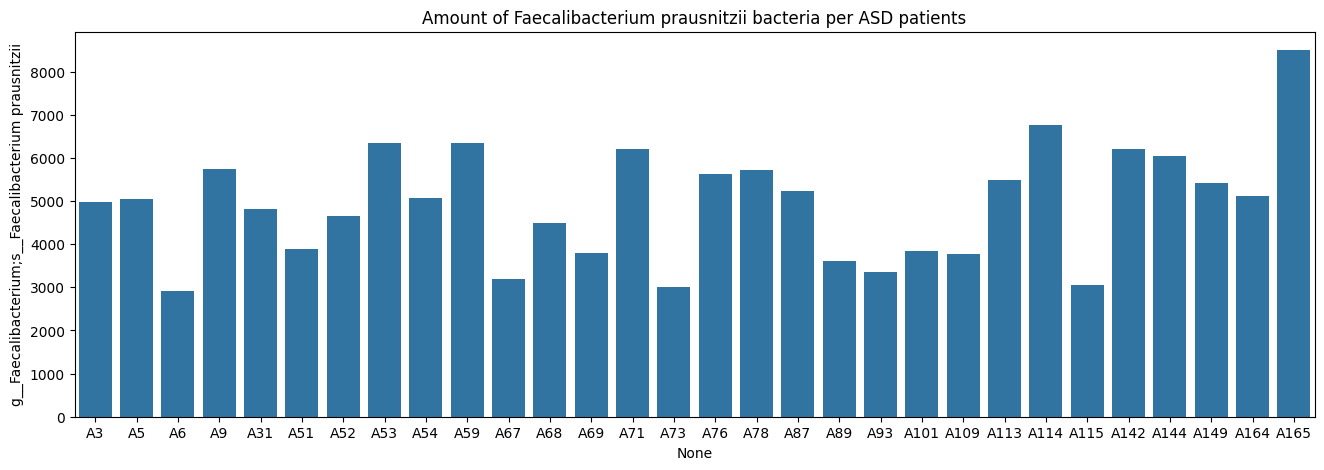

In [109]:
# Bar graph of the amount of Faecalibacterium prausnitzii bacteria in ASD patients
plt.figure(figsize=(16,5))
plt.title("Amount of Faecalibacterium prausnitzii bacteria per ASD patients")
sns.barplot(data=ASD, y="g__Faecalibacterium;s__Faecalibacterium prausnitzii", x=ASD.index)

Analysis: This bar graph goes to show the variability of bacteria within each individual, despite being consistently disease/non-diseased. Thus, the microbiome is an enterotype, and can be used almost as a fingerprint for person identification.

In [ ]:
# all the bacteria in an array
# bacteria = [g__Faecalibacterium;s__Faecalibacterium prausnitzii	g__Hungatella;s__Hungatella hathewayi	g__Clostridium;s__uncultured Clostridium sp.	g__Butyricimonas;s__Butyricimonas virosa	g__Alistipes;s__Alistipes indistinctus	g__Unclassified;s__Firmicutes bacterium CAG:176	g__Clostridium;s__Clostridium sp. CAG:7	g__Unclassified;s__Firmicutes bacterium CAG:882	g__Lachnoclostridium;s__[Clostridium] asparagiforme	g__Butyricicoccus;s__uncultured Butyricicoccus sp.	g__Unclassified;s__Firmicutes bacterium CAG:95	g__Oscillibacter;s__Oscillibacter sp. ER4	g__Desulfovibrio;s__Desulfovibrio piger	g__Fusobacterium;s__Fusobacterium mortiferum	g__Clostridium;s__Clostridium sp. GD3	g__Unclassified;s__Firmicutes bacterium CAG:124	g__Unclassified;s__Burkholderiales bacterium YL45	g__Ruminococcus;s__Ruminococcus callidus	g__Flavonifractor;s__uncultured Flavonifractor sp.	g__Subdoligranulum;s__Subdoligranulum variabile	g__Clostridium;s__Clostridium sp. CAG:127	g__Clostridium;s__Clostridium sp. CAG:510	g__Phascolarctobacterium;s__Phascolarctobacterium sp. CAG:207	g__Eubacterium;s__Eubacterium sp. CAG:38	g__Eubacterium;s__Eubacterium sp. CAG:192	g__Clostridium;s__Clostridium sp. CAG:242	g__Roseburia;s__Roseburia sp. CAG:380	g__Ruminococcus;s__Ruminococcus sp. CAG:254	g__Prevotella;s__Prevotella copri	g__Unclassified;s__Firmicutes bacterium CAG:110	g__Ruminococcus;s__uncultured Ruminococcus sp.	g__Clostridium;s__Clostridium sp. CAG:75	g__Lachnoclostridium;s__[Clostridium] bolteae	g__Prevotella;s__Prevotella sp. CAG:1092	g__Holdemanella;s__Holdemanella biformis	g__Prevotella;s__Prevotella sp. CAG:279	g__Dialister;s__Dialister succinatiphilus	g__Eubacterium;s__Eubacterium sp. CAG:252	g__Alistipes;s__Alistipes sp. CAG:268	g__Ruminococcus;s__Ruminococcus lactaris	g__Eubacterium;s__Eubacterium sp. CAG:202	g__Faecalibacterium;s__Faecalibacterium sp. CAG:74	g__Clostridium;s__Clostridium sp. CAG:277	g__Prevotella;s__Prevotella sp. CAG:1058	g__Roseburia;s__Roseburia inulinivorans	g__Phascolarctobacterium;s__Phascolarctobacterium sp. CAG:266	g__Akkermansia;s__Akkermansia sp. CAG:344	g__Prevotella;s__Prevotella sp. CAG:1031	g__Eubacterium;s__Eubacterium sp. CAG:156	g__Clostridium;s__Clostridium sp. CAG:299	g__Sutterella;s__Sutterella parvirubra	g__Mycoplasma;s__Mycoplasma sp. CAG:472	g__Megasphaera;s__Megasphaera sp. DJF_B143	g__Eubacterium;s__Eubacterium sp. CAG:786	g__Unclassified;s__Firmicutes bacterium CAG:137	g__Escherichia;s__Escherichia coli	g__Unclassified;s__Firmicutes bacterium CAG:103	g__Unclassified;s__[Eubacterium] rectale	g__Clostridium;s__Clostridium sp. CAG:62	g__Roseburia;s__Roseburia intestinalis	g__Coprobacillus;s__Coprobacillus sp. CAG:605	g__Bacteroides;s__Bacteroides fragilis	g__Eubacterium;s__Eubacterium ventriosum	g__Clostridium;s__Clostridium sp. CAG:43	g__Bilophila;s__Bilophila wadsworthia	g__Unclassified;s__Firmicutes bacterium CAG:313	g__Ruminococcus;s__Ruminococcus sp. CAG:488	g__Clostridium;s__Clostridium sp. CAG:245	g__Clostridium;s__Clostridium sp. CAG:451	g__Clostridium;s__Clostridium sp. CAG:269	g__Clostridium;s__Clostridium sp. CAG:58	g__Eubacterium;s__Eubacterium sp. CAG:86	g__Eubacterium;s__[Eubacterium] eligens	g__Ruminiclostridium;s__[Eubacterium] siraeum	g__Faecalibacterium;s__Faecalibacterium sp. CAG:82	g__Clostridium;s__Clostridium sp. CAG:417	g__Roseburia;s__Roseburia sp. CAG:197	g__Bifidobacterium;s__Bifidobacterium adolescentis	g__Bacteroides;s__Bacteroides vulgatus	g__Odoribacter;s__Odoribacter splanchnicus	g__Bacteroides;s__Bacteroides uniformis	g__Eubacterium;s__Eubacterium sp. CAG:248	g__Phascolarctobacterium;s__Phascolarctobacterium succinatutens	g__Bacteroides;s__Bacteroides thetaiotaomicron	g__Clostridium;s__Clostridium sp. KLE 1755	g__Unclassified;s__Firmicutes bacterium CAG:345	g__Clostridium;s__Clostridium sp. AT5	g__Bacteroides;s__Bacteroides stercoris	g__Clostridium;s__Clostridium sp. CAG:302	g__Bacteroides;s__Bacteroides ovatus	g__Unclassified;s__Lachnospiraceae bacterium TF01-11	g__Unclassified;s__Firmicutes bacterium CAG:129	g__Blautia;s__[Ruminococcus] torques	g__Sutterella;s__Sutterella sp. CAG:397	g__Unclassified;s__Firmicutes bacterium CAG:170	g__Parabacteroides;s__Parabacteroides merdae	g__Oscillibacter;s__Oscillibacter sp. CAG:241	g__Prevotella;s__Prevotella sp. KHD1	g__Prevotella;s__Prevotella copri CAG:164	g__Clostridium;s__Clostridium sp. CAG:343	...	g__Clostridium;s__Clostridium sp. NCR	g__Caviibacter;s__Caviibacter abscessus	g__Unclassified;s__Ignavibacteria bacterium RIFCSPLOWO2_12_FULL_56_21	g__Unclassified;s__Nitrospira bacterium SG8_35_4	g__Unclassified;s__Nitrospirae bacterium GWC2_57_9	g__Asticcacaulis;s__Asticcacaulis benevestitus	g__Aureimonas;s__Aureimonas altamirensis	g__Mesorhizobium;s__Mesorhizobium muleiense	g__Mesorhizobium;s__Mesorhizobium qingshengii	g__Mesorhizobium;s__Mesorhizobium sp. Root552	g__Kaistia;s__Kaistia granuli	g__Tepidicaulis;s__Tepidicaulis marinus	g__Labrys;s__Labrys sp. WJW	g__Falsirhodobacter;s__Falsirhodobacter sp. alg1	g__Rhodobacter;s__Rhodobacter sp. CACIA14H1	g__Roseobacter;s__Roseobacter sp. SK209-2-6	g__Sulfitobacter;s__Sulfitobacter geojensis	g__Asaia;s__Asaia astilbis	g__Skermanella;s__Skermanella aerolata	g__Elioraea;s__Elioraea tepidiphila	g__Novosphingobium;s__Novosphingobium acidiphilum	g__Bordetella;s__Bordetella sp. SCN 68-11	g__Pusillimonas;s__Pusillimonas sp. T7-7	g__Caballeronia;s__Paraburkholderia sordidicola	g__Paraburkholderia;s__Paraburkholderia andropogonis	g__Paraburkholderia;s__Paraburkholderia nodosa	g__Duganella;s__Duganella sp. Root1480D1	g__Janthinobacterium;s__Janthinobacterium agaricidamnosum	g__Sphaerotilus;s__Sphaerotilus natans	g__Ferrovum;s__Ferrovum sp. JA12	g__Ferriphaselus;s__Ferriphaselus amnicola	g__Methylophilus;s__Methylophilus sp. TWE2	g__Aquitalea;s__Aquitalea pelogenes	g__Chitiniphilus;s__Chitiniphilus shinanonensis	g__Eikenella;s__Eikenella corrodens	g__Neisseria;s__Neisseria mucosa	g__Neisseria;s__Neisseria sp. HMSC055H02	g__Neisseria;s__Neisseria sp. HMSC061B04	g__Neisseria;s__Neisseria sp. HMSC066H01	g__Neisseria;s__Neisseria sp. HMSC068C04	g__Snodgrassella;s__Snodgrassella sp. R-53583	g__Nitrosomonas;s__Nitrosomonas marina	g__Azoarcus;s__Azoarcus sp. KH32C	g__Desulfovibrio;s__Desulfovibrio sp. L21-Syr-AB	g__Hippea;s__Hippea sp. KM1	g__Unclassified;s__Deltaproteobacteria bacterium RIFOXYD12_FULL_55_16	g__Unclassified;s__Deltaproteobacteria bacterium RIFOXYD12_FULL_56_24	g__Nautilia;s__Nautilia profundicola	g__Sulfurovum;s__Sulfurovum lithotrophicum	g__Aeromonas;s__Aeromonas media	g__Thioalkalivibrio;s__Thioalkalivibrio sp. ALE16	g__Enterobacter;s__Enterobacter sp. BWH52	g__Enterobacter;s__Enterobacter sp. NFIX09	g__Klebsiella;s__Klebsiella oxytoca	g__Mangrovibacter;s__Mangrovibacter sp. MFB070	g__Unclassified;s__Type-F symbiont of Plautia stali	g__Tatumella;s__Tatumella morbirosei	g__Providencia;s__Providencia stuartii	g__Yersinia;s__Yersinia pestis	g__Legionella;s__Legionella erythra	g__Legionella;s__Legionella spiritensis	g__Methylobacter;s__Methylobacter luteus	g__Nevskia;s__Nevskia soli	g__Endozoicomonas;s__Endozoicomonas sp. ab112	g__Terasakiispira;s__Terasakiispira papahanaumokuakeensis	g__Avibacterium;s__Avibacterium paragallinarum	g__Acinetobacter;s__Acinetobacter soli	g__Acinetobacter;s__Acinetobacter sp. NIPH 284	g__Pseudomonas;s__Pseudomonas batumici	g__Pseudomonas;s__Pseudomonas caeni	g__Pseudomonas;s__Pseudomonas extremorientalis	g__Pseudomonas;s__Pseudomonas sp. BAY1663	g__Pseudomonas;s__Pseudomonas veronii	g__Unclassified;s__Bathymodiolus septemdierum thioautotrophic gill symbiont	g__Unclassified;s__Gammaproteobacteria bacterium RBG_16_51_14	g__Unclassified;s__Gammaproteobacteria bacterium RIFCSPHIGHO2_12_FULL_63_22	g__Vibrio;s__Vibrio sp. OY15	g__Rhodanobacter;s__Rhodanobacter sp. Root561	g__Mycoplasma;s__Mycoplasma arginini	g__Mycoplasma;s__Mycoplasma penetrans	g__Thermodesulfatator;s__Thermodesulfatator indicus	g__Unclassified;s__candidate division TA06 bacterium DG_78	g__Unclassified;s__uncultured marine bacterium EB0_49D07	g__Sugiyamaella;s__Sugiyamaella lignohabitans	g__Calocera;s__Calocera cornea	g__Uromyces;s__Uromyces hobsonii	g__Mitosporidium;s__Mitosporidium daphniae	g__Lichtheimia;s__Lichtheimia ramosa	g__T4virus;s__Aeromonas phage phiAS5	g__Unclassified;s__Bacillus phage BCD7	g__Unclassified;s__Clostridium phage c-st	g__Unclassified;s__Enterococcus phage EFDG1	g__Unclassified;s__Podovirus Lau218	g__Sap6virus;s__Enterococcus phage VD13	g__Unclassified;s__Bacillus phage vB_BanS-Tsamsa	g__Unclassified;s__Gordonia phage GTE2	g__Alphabaculovirus;s__Hyphantria cunea nucleopolyhedrovirus	g__Potyvirus;s__Bean common mosaic virus	g__Potyvirus;s__Telosma mosaic virus	g__Unclassified;s__Freshwater phage uvFW-CGR-AMD-COM-C203]

# Statistical Analysis

Statistical Questions:
- Which phylum of bacteria is most common among all individuals?
- Which bacteria is most and least common for ASD patients?
- Which bacteria has the greatest difference among ASD and control patients?
- Is the diversity of the microbiome different?

## 1. Which phylum of bacteria is the most common among all indivudals?

In [ ]:
# group by phylum
phylum = phylum.groupby("Taxonomy").mean()

In [ ]:
# transpose the datatable to aggregate and sort all user columns for the bacteria
phylum = phylum.transpose()
phylum.mean().sort_values(ascending=False)

## Analysis - the most common bacteria phylum among all individuals:

g__Hungatella          3575.300000

g__Faecalibacterium    1223.083333

g__Flavonifractor       868.583333

g__Butyricicoccus       750.916667

g__Bilophila            498.466667

## 2. Which bacteria is most and least common for ASD patients? 

In [ ]:
# Find the most common bacteria in ASD patients
ASD.mean().sort_values(ascending=False)

### Analysis - The most and least common bacteria in ASD patients is:

MOST

g__Faecalibacterium;s__Faecalibacterium prausnitzii                                4942.800000

g__Clostridium;s__uncultured Clostridium sp.                                       3708.966667

g__Hungatella;s__Hungatella hathewayi                                              3386.533333

g__Phascolarctobacterium;s__Phascolarctobacterium sp. CAG:207                      1627.100000

g__Clostridium;s__Clostridium sp. CAG:7                                            1611.266667

LEAST     
g__Paenibacillus;s__Paenibacillus sp. 181mfcol5.1                                     0.000000

g__Mesotoga;s__Mesotoga infera                                                        0.000000

g__Streptococcus;s__Streptococcus sp. SK643                                           0.000000

g__Unclassified;s__Candidatus Sungbacteria bacterium RIFCSPHIGHO2_02_FULL_52_23       0.000000

g__Unclassified;s__Freshwater phage uvFW-CGR-AMD-COM-C203                             0.000000

## 3. Which bacteria has the greatest percent difference among ASD and control patients?


In [ ]:
# TODO: 
difference = ASD.copy-control.copy
difference.mean().sort_values(ascending=False)

### Analysis - Bacteria with greatest percent difference between ASD and control:


## 4. Is the diversity (variety of species) of the microbiome different between ASD & control?

for all A s, find the number of bacteria columns that are 0, then compare to the B s

In [113]:
# chatgpt
def count_zeros(df):
    count = 0
    for column in df.columns:
        count += (df[column] == 0).sum()
    return count
#

zero_count_ASD = count_zeros(ASD)
zero_count_control = count_zeros(control)
zero_count_control, zero_count_ASD

(115420, 108345)

### Analysis
Thus, the microbiome diversity is greater in a normal patient. This isn't as accurate as the Shannon Index, but it gives us a basic understanding that there is more variety in microbiome species for a healthy individual.